In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import scatter_matrix

In [ ]:
import torch

print(torch.version.cuda)
print(torch.backends.cudnn.enabled)

12.8
True


In [ ]:
if not torch.cuda.is_available():
    raise RuntimeError("CUDA is not available. Check your drivers and installation!")
print("Found", torch.cuda.device_count(), "GPU(s):", [torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())])

Found 1 GPU(s): ['NVIDIA GeForce RTX 3070 Ti Laptop GPU']


In [ ]:
device = torch.device("cuda") 

## DMG 1 MK2

### Dataset 2 has anomaly

In [ ]:
df2 = pd.read_csv('./Datasets/Dataset02_Matrix_Rocker4EncoderNotWorking.csv')
df2.head()

,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Encoder_vSafetyHFP_1,Encoder_vSafetyHFP_2,Encoder_vSafetyHFP_3,Encoder_vSafetyHFP_4,Encoder_vSafetyHFP_5,Encoder_vSafetyHFP_6,Time
0,-0.018964,-0.025433,0.008373,0.001387,-0.014673,0.010472,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000006,0.00000
1,-0.025091,-0.021360,0.007988,-0.001536,-0.008852,0.002152,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0.00025
2,-0.026657,-0.021689,0.007212,-0.000004,-0.005338,-0.005628,-0.000006,0.000030,9.411765e-07,0.0,-0.000021,-0.000005,0.00050
3,-0.023970,-0.019123,0.009580,-0.001420,-0.002740,-0.009748,-0.000006,0.000015,9.411765e-07,0.0,-0.000021,-0.000005,0.00075
4,-0.027541,-0.020061,0.001411,0.006533,-0.010312,-0.012460,-0.000014,0.000015,9.411765e-07,0.0,-0.000019,-0.000005,0.00100


### Dataset 7, 8, 9, 10 do not have anomaly

In [ ]:
df7 = pd.read_csv('./Datasets/Dataset07_Demo_Spa_GT.csv')
df8 = pd.read_csv('./Datasets/Dataset08_Demo_Jiggler.csv')
df9 = pd.read_csv('./Datasets/Dataset09_Demo_VerticalChirp.csv')
df10 = pd.read_csv('./Datasets/Dataset10_Demo_Spa_GT.csv')

print("Dataset 2 shape:", df2.shape)
print("Dataset 7 shape:", df7.shape)
print("Dataset 8 shape:", df8.shape)
print("Dataset 9 shape:", df9.shape)    
print("Dataset 10 shape:", df10.shape)

Dataset 2 shape: (69377, 13)
Dataset 7 shape: (345300, 85)
Dataset 8 shape: (124600, 13)
Dataset 9 shape: (79200, 13)
Dataset 10 shape: (565600, 85)


In [ ]:
df8.head()

,Encoder_xAxisHFP_1,Encoder_xAxisHFP_2,Encoder_xAxisHFP_3,Encoder_xAxisHFP_4,Encoder_xAxisHFP_5,Encoder_xAxisHFP_6,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Time
0,1.346476,1.678421,1.779897,1.704498,0.490239,0.371858,8.361759,-0.489034,1.268314,1.400914,5.572665,0.169277,0.0000
1,1.346182,1.678822,1.780083,1.704193,0.489652,0.371529,-3.524980,-1.328421,0.705853,-3.247539,-4.825640,-1.215278,0.0005
2,1.346476,1.678702,1.780454,1.704474,0.490047,0.371283,-0.216795,1.683945,0.187439,2.142809,7.067955,-2.946010,0.0010
3,1.346739,1.678798,1.780718,1.704181,0.489681,0.371193,-2.441366,-5.807879,-0.797604,-0.900363,1.097144,-1.367628,0.0015
4,1.347135,1.678810,1.781353,1.704325,0.489094,0.371181,5.833975,-1.059226,4.136967,8.869238,-3.777398,2.828397,0.0020


In [ ]:
df9.head()

,Encoder_xAxisHFP_1,Encoder_xAxisHFP_2,Encoder_xAxisHFP_3,Encoder_xAxisHFP_4,Encoder_xAxisHFP_5,Encoder_xAxisHFP_6,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Time
0,1.090295,1.129411,1.136872,1.097449,0.845158,0.845787,-4.989021,0.646729,1.621310,-1.393544,4.264065,-0.787076,0.0000
1,1.090337,1.129256,1.136949,1.097354,0.844894,0.845679,-1.748642,-0.864758,-0.299018,-1.439162,-1.657592,3.300695,0.0005
2,1.090469,1.129459,1.136758,1.097132,0.845361,0.845697,4.315208,-1.429892,-2.949755,-5.802564,3.474137,0.849502,0.0010
3,1.090582,1.129357,1.136943,1.097545,0.845002,0.845547,-0.578964,2.919351,0.251201,-0.791732,-0.833515,2.072803,0.0015
4,1.090564,1.129519,1.136668,1.097725,0.845026,0.845769,-2.083757,-0.321513,1.720767,3.018173,-1.219515,3.290257,0.0020


In [ ]:
print("Dataset 2 columns:", df2.columns.tolist())
print("Dataset 8 columns:", df8.columns.tolist())
print("Dataset 9 columns:", df9.columns.tolist())

Dataset 2 columns: ['Encoder_vAxisHFP_1', 'Encoder_vAxisHFP_2', 'Encoder_vAxisHFP_3', 'Encoder_vAxisHFP_4', 'Encoder_vAxisHFP_5', 'Encoder_vAxisHFP_6', 'Encoder_vSafetyHFP_1', 'Encoder_vSafetyHFP_2', 'Encoder_vSafetyHFP_3', 'Encoder_vSafetyHFP_4', 'Encoder_vSafetyHFP_5', 'Encoder_vSafetyHFP_6', 'Time']
Dataset 8 columns: ['Encoder_xAxisHFP_1', 'Encoder_xAxisHFP_2', 'Encoder_xAxisHFP_3', 'Encoder_xAxisHFP_4', 'Encoder_xAxisHFP_5', 'Encoder_xAxisHFP_6', 'Encoder_vAxisHFP_1', 'Encoder_vAxisHFP_2', 'Encoder_vAxisHFP_3', 'Encoder_vAxisHFP_4', 'Encoder_vAxisHFP_5', 'Encoder_vAxisHFP_6', 'Time']
Dataset 9 columns: ['Encoder_xAxisHFP_1', 'Encoder_xAxisHFP_2', 'Encoder_xAxisHFP_3', 'Encoder_xAxisHFP_4', 'Encoder_xAxisHFP_5', 'Encoder_xAxisHFP_6', 'Encoder_vAxisHFP_1', 'Encoder_vAxisHFP_2', 'Encoder_vAxisHFP_3', 'Encoder_vAxisHFP_4', 'Encoder_vAxisHFP_5', 'Encoder_vAxisHFP_6', 'Time']


Dataset 7 and 10 have a different shape to not using it right now

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def minmax_run(df, feature_cols):
    scaler = MinMaxScaler(feature_range=(0,1))
    df_scaled = df.copy()
    df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])
    return df_scaled

sensor_cols = df8.columns[6:-1].tolist()
df8_mm = minmax_run(df8, sensor_cols)
df9_mm = minmax_run(df9, sensor_cols)
pooled = pd.concat([df8_mm[sensor_cols + ['Time']], df9_mm[sensor_cols + ['Time']]], ignore_index=True)
pooled.shape

(203800, 7)

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.001,
    random_state=42,
)

iso.fit(pooled)


,n_estimators,100
,max_samples,'auto'
,contamination,0.001
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [ ]:
df2_mm = minmax_run(df2, sensor_cols)

# get raw anomaly scores
anomaly_scores = iso.decision_function(df2_mm[sensor_cols + ['Time']])

# flag anomalies (True/False)
df2_mm["is_anomaly"] = iso.predict(df2_mm[sensor_cols + ['Time']]) == -1


In [ ]:
df2_mm['is_anomaly'].value_counts()

is_anomaly
False    67371
True      2006
Name: count, dtype: int64

In [ ]:
df2_mm

,Encoder_vAxisHFP_1,Encoder_vAxisHFP_2,Encoder_vAxisHFP_3,Encoder_vAxisHFP_4,Encoder_vAxisHFP_5,Encoder_vAxisHFP_6,Encoder_vSafetyHFP_1,Encoder_vSafetyHFP_2,Encoder_vSafetyHFP_3,Encoder_vSafetyHFP_4,Encoder_vSafetyHFP_5,Encoder_vSafetyHFP_6,Time,is_anomaly
0,0.387098,0.352460,0.544190,0.496764,0.455315,0.498785,-0.000006,0.000030,9.411765e-07,0.0,-2.070588e-05,-0.000006,0.00000,False
1,0.350818,0.378774,0.541947,0.479117,0.491167,0.448354,-0.000006,0.000030,9.411765e-07,0.0,-2.070588e-05,-0.000005,0.00025,False
2,0.341542,0.376648,0.537419,0.488364,0.512807,0.401195,-0.000006,0.000030,9.411765e-07,0.0,-2.070588e-05,-0.000005,0.00050,False
3,0.357453,0.393225,0.551232,0.479818,0.528808,0.376222,-0.000006,0.000015,9.411765e-07,0.0,-2.070588e-05,-0.000005,0.00075,False
4,0.336309,0.387169,0.503576,0.527843,0.482172,0.359786,-0.000014,0.000015,9.411765e-07,0.0,-1.882353e-05,-0.000005,0.00100,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69372,0.193243,0.686989,0.460116,0.525106,0.565246,0.395944,0.000026,-0.000049,5.835294e-05,0.0,9.411765e-06,-0.000030,17.34300,False
69373,0.202703,0.700221,0.476729,0.517238,0.556117,0.404297,0.000026,-0.000049,5.835294e-05,0.0,9.411765e-06,-0.000030,17.34325,False
69374,0.208475,0.711970,0.446924,0.520223,0.557257,0.397892,0.000026,-0.000049,5.835294e-05,0.0,9.411765e-06,-0.000030,17.34350,False
69375,0.204369,0.698291,0.425260,0.515507,0.608679,0.372314,0.000026,-0.000049,5.835294e-05,0.0,9.411765e-06,-0.000030,17.34375,False


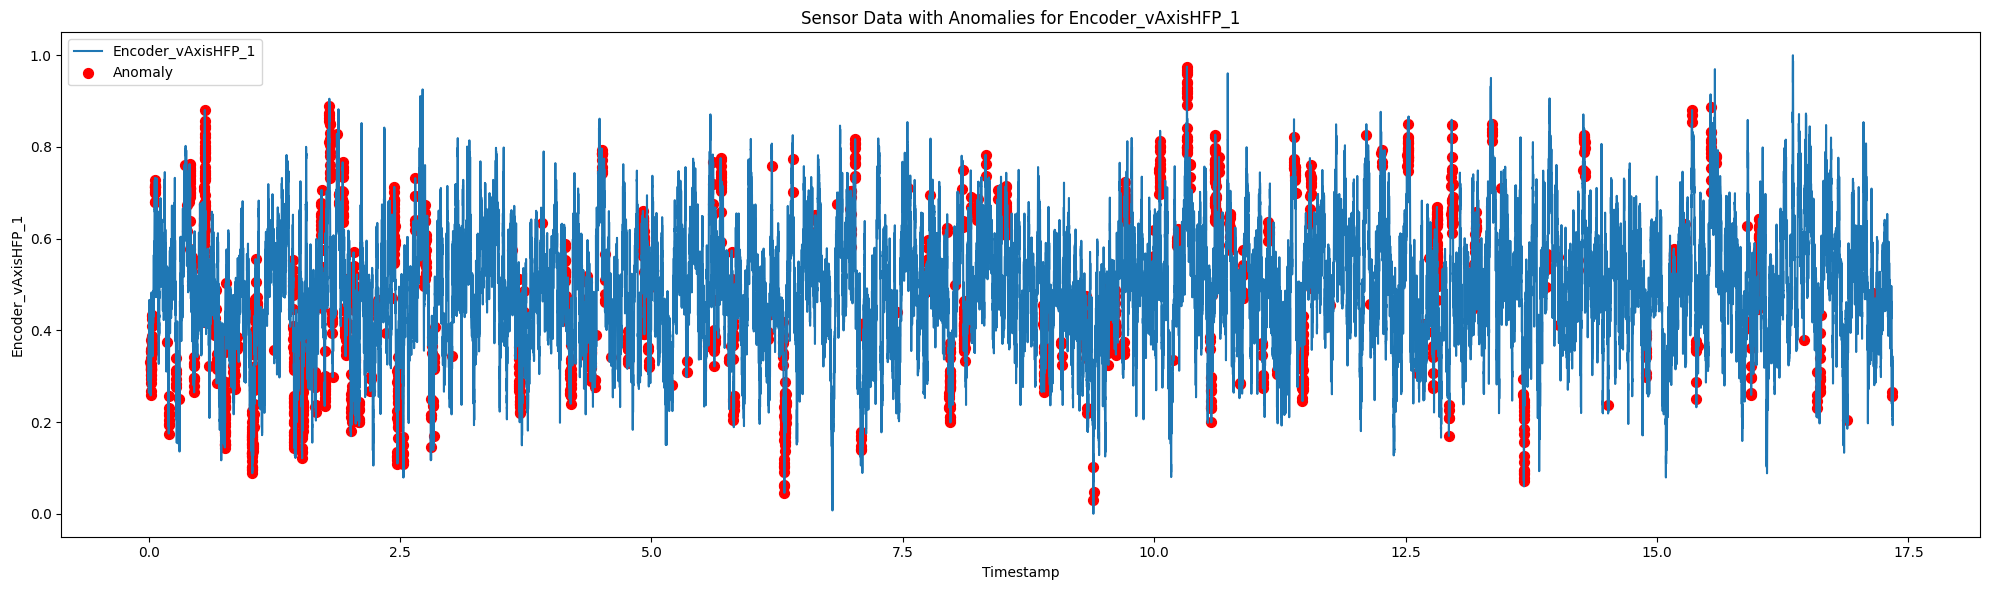

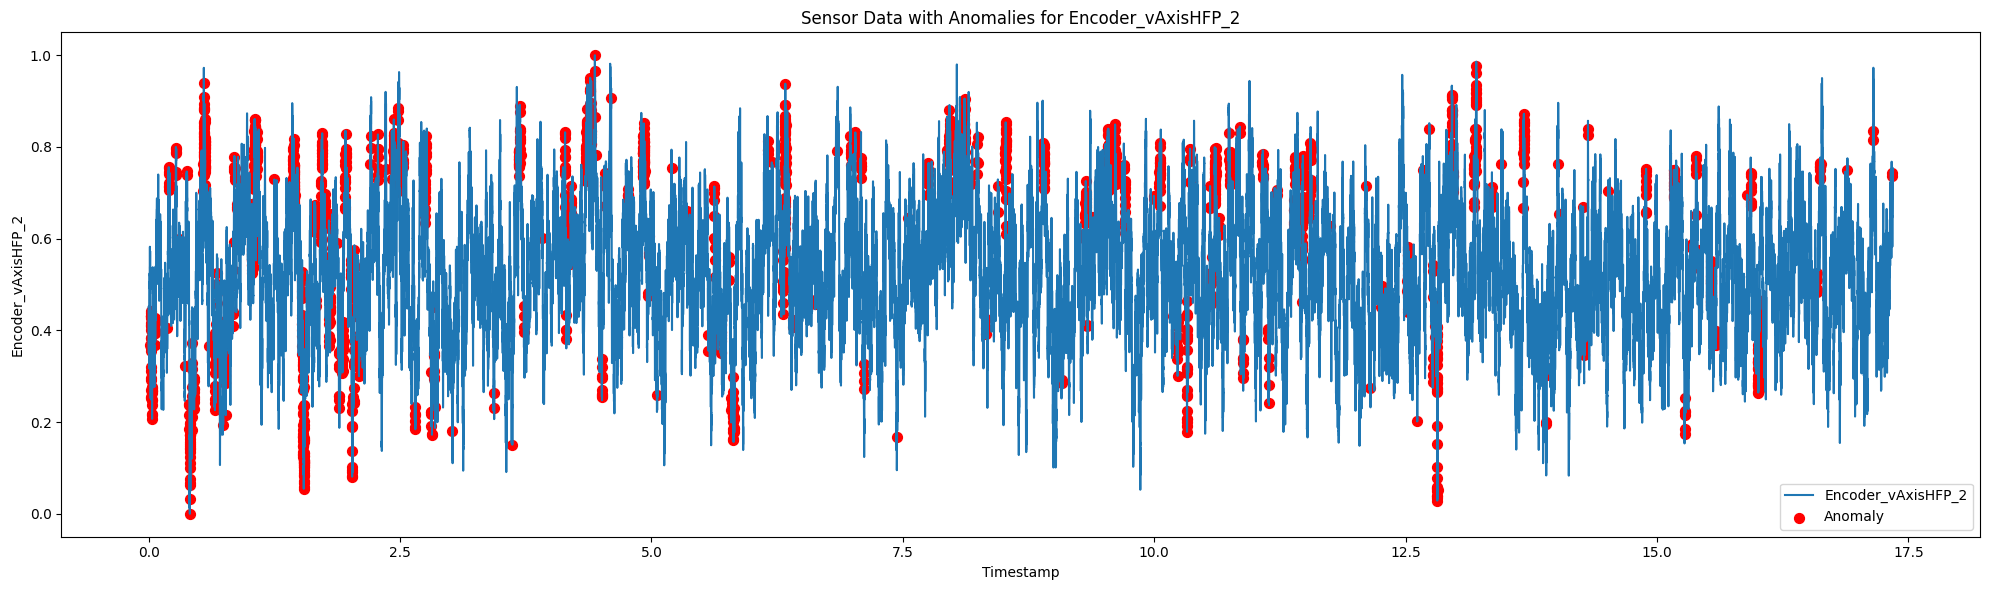

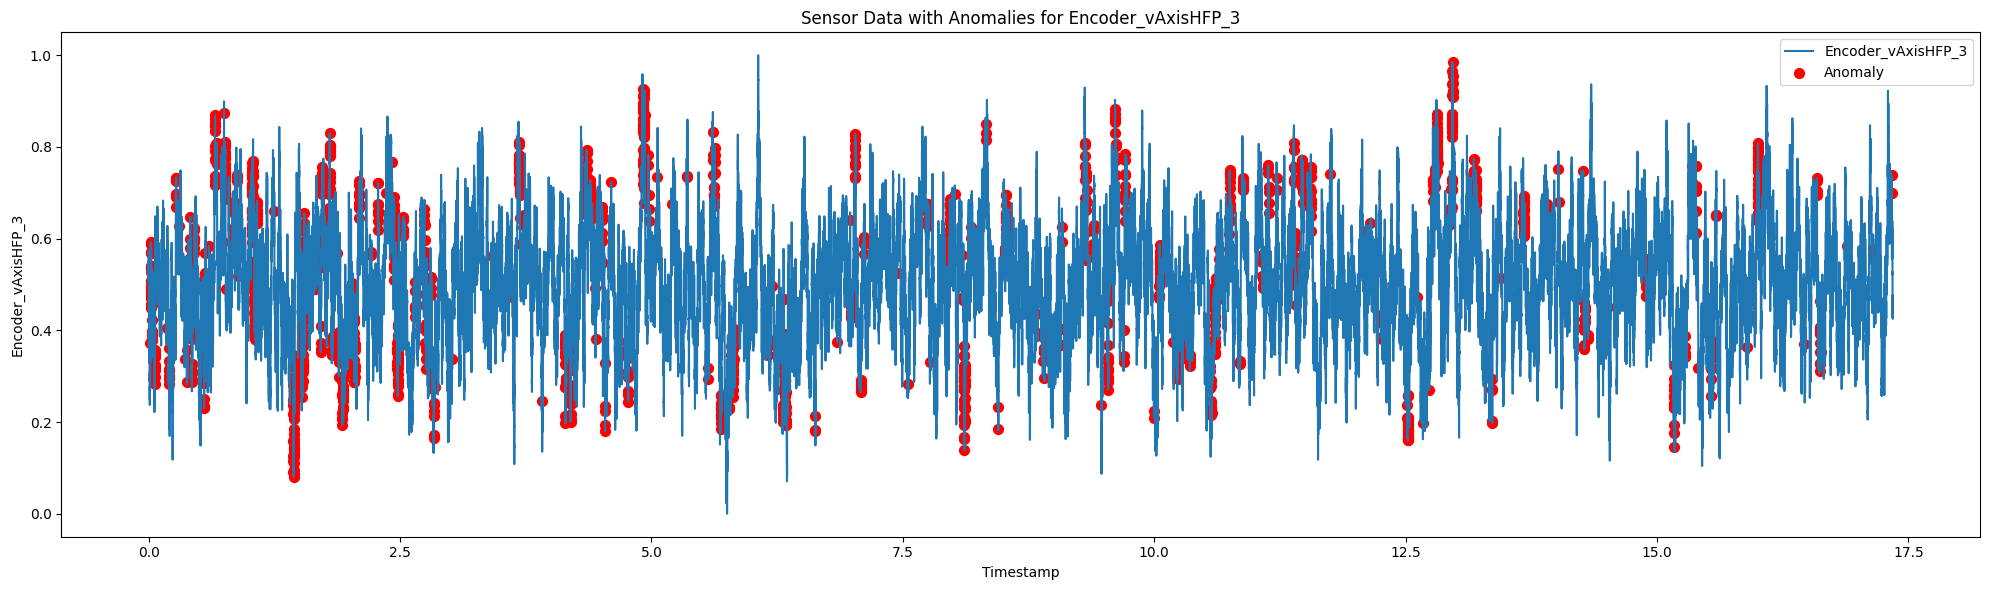

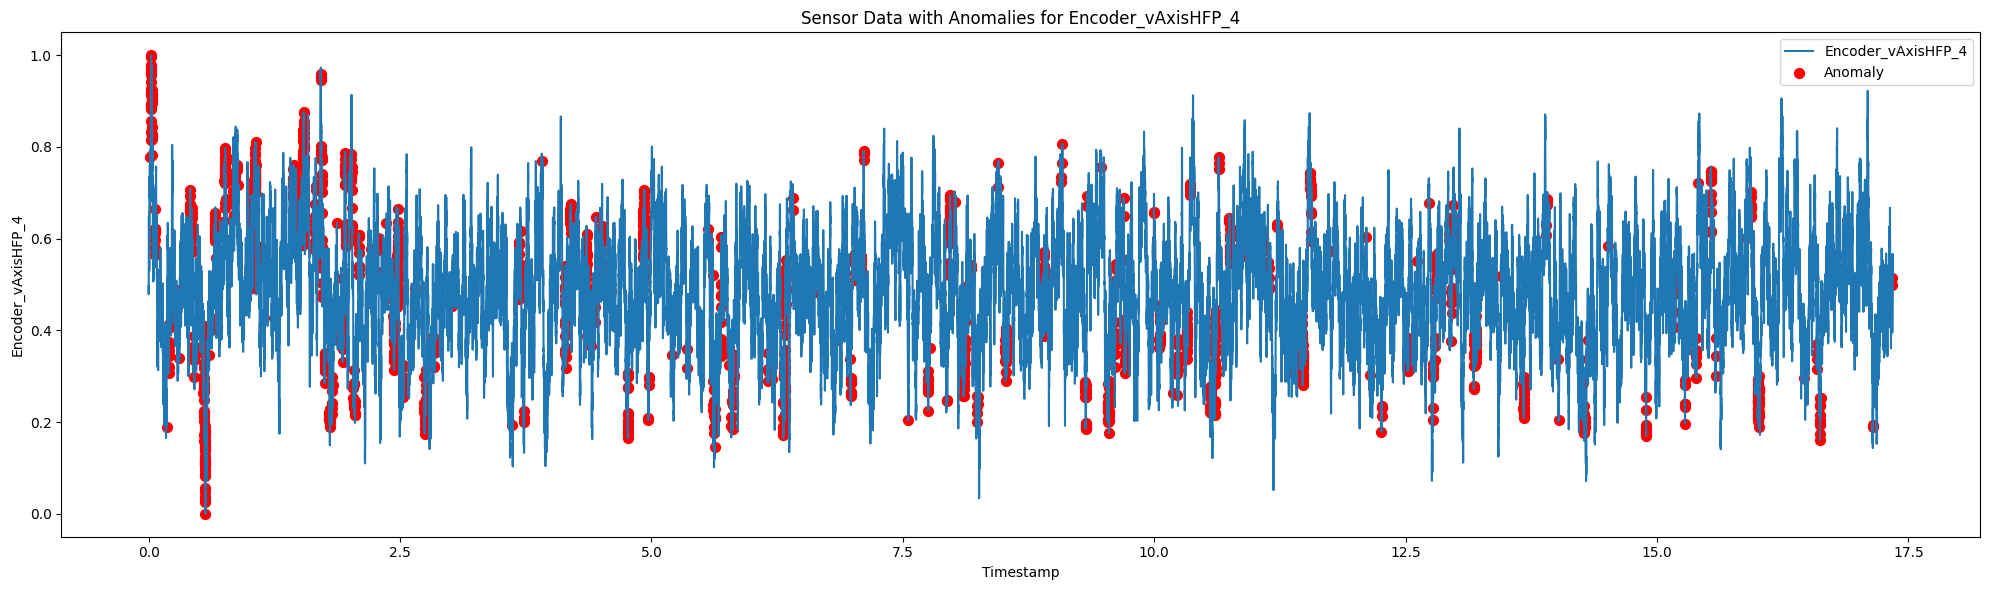

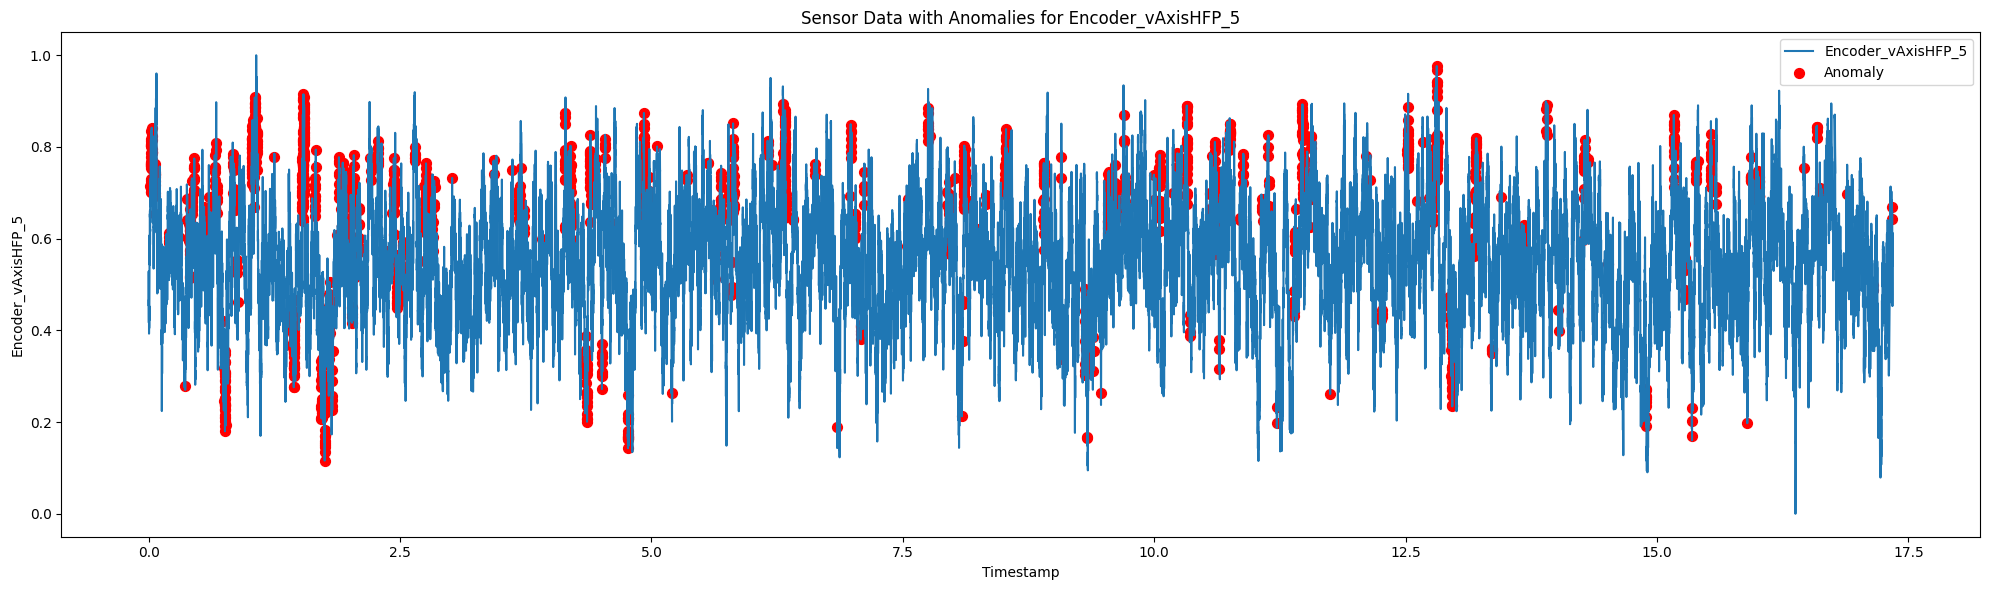

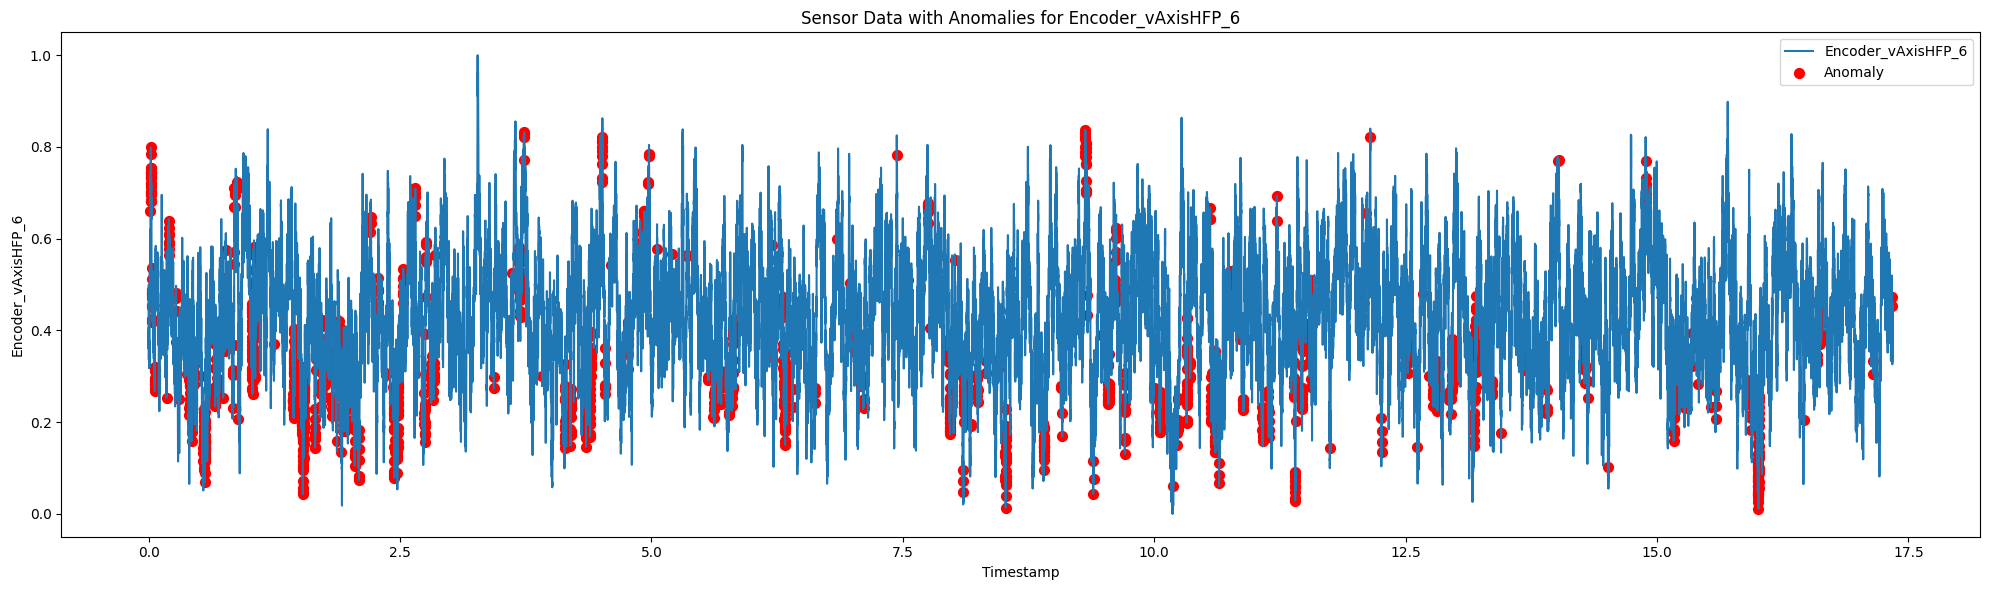

In [ ]:
for i in range(len(sensor_cols)):
    plt.figure(figsize=(20, 6))
    plt.plot(df2_mm['Time'], df2_mm[sensor_cols[i]], label=sensor_cols[i])
    plt.scatter(
        df2_mm.loc[df2_mm['is_anomaly'], 'Time'],
        df2_mm.loc[df2_mm['is_anomaly'], sensor_cols[i]],
        color='red',
        label='Anomaly',
        s=50
    )
    plt.xlabel('Timestamp')
    plt.ylabel(sensor_cols[i])
    plt.title(f'Sensor Data with Anomalies for {sensor_cols[i]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

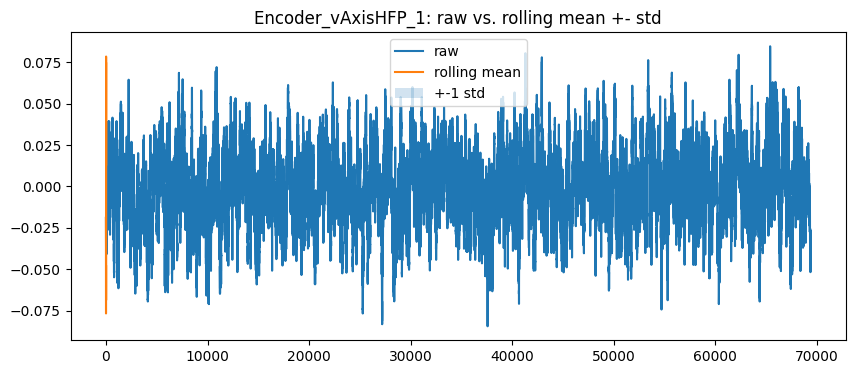

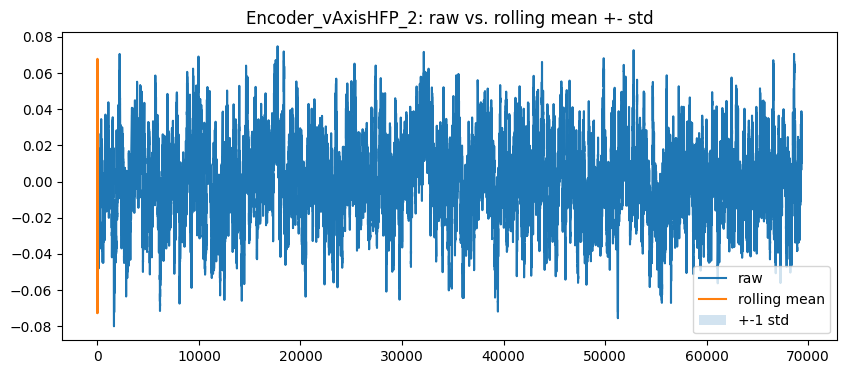

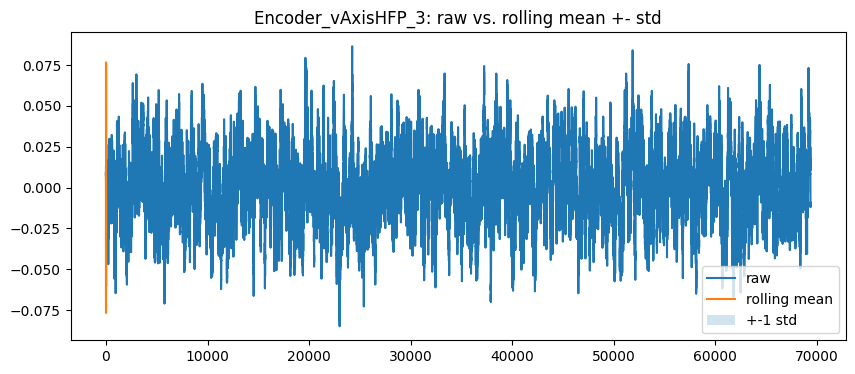

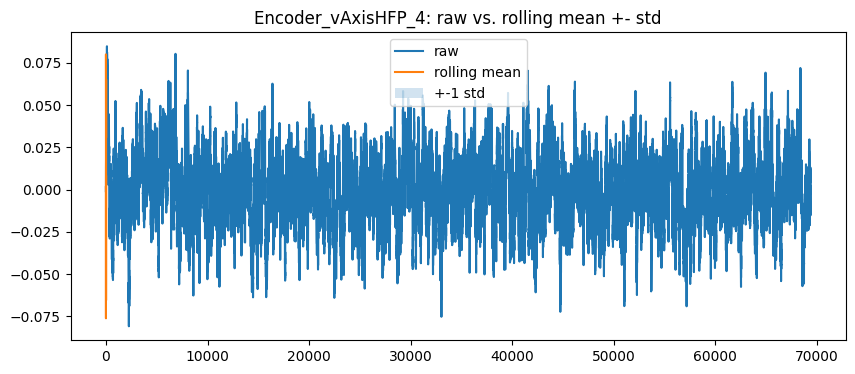

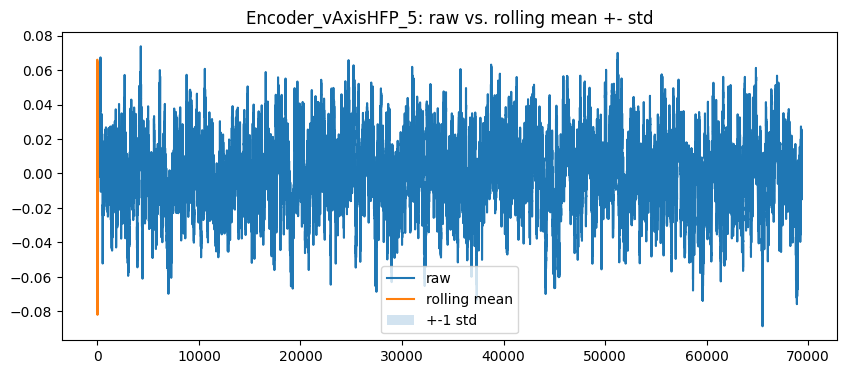

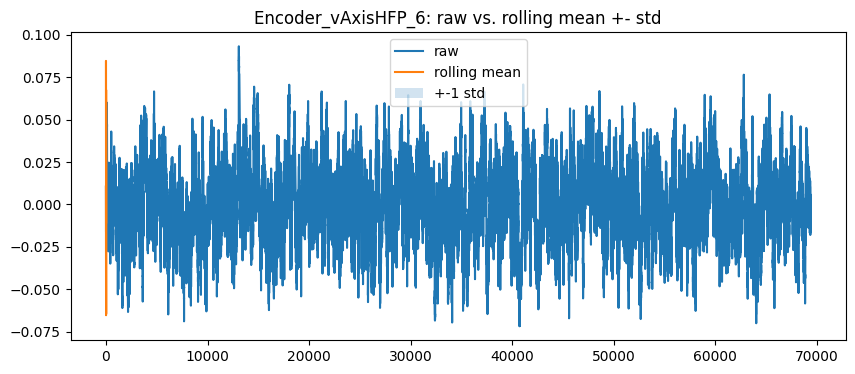

In [ ]:
window = 10

# Compute rolling mean and std for all sensors:
rolling_mean = df2.rolling(window=window, min_periods=1, center=False, on='Time').mean()
rolling_std = df2.rolling(window=window, min_periods=1, center=False, on='Time').std()

#  Other aggregations:
rolling_median = df2.rolling(window, min_periods=1, on='Time').median()
rolling_quantile = df2.rolling(window, min_periods=1, on='Time').quantile(0.95)
rolling_var = df2.rolling(window, min_periods=1, on='Time').var()

for sensor in sensor_cols:    
    plt.figure(figsize=(10,4))
    plt.plot(df2.index, df2[sensor], label='raw')
    plt.plot(rolling_mean['Time'], rolling_mean[sensor], label='rolling mean')
    plt.fill_between(rolling_mean.index,
                    rolling_mean[sensor] - rolling_std[sensor],
                    rolling_mean[sensor] + rolling_std[sensor],
                    alpha=0.2, label='+-1 std')
    plt.legend()
    plt.title(f"{sensor}: raw vs. rolling mean +- std")
    plt.show()

That doesnt look right

In [ ]:
p1 = df2[sensor_cols].quantile(0.01)
p99 = df2[sensor_cols].quantile(0.99)

low_pts = df2[sensor_cols + ['Time']].copy()
high_pts = df2[sensor_cols + ['Time']].copy()
for sensor in sensor_cols:
    low_pts[sensor]  = df2[sensor][df2[sensor] <= p1[sensor]]
    high_pts[sensor] = df2[sensor][df2[sensor] >= p99[sensor]]

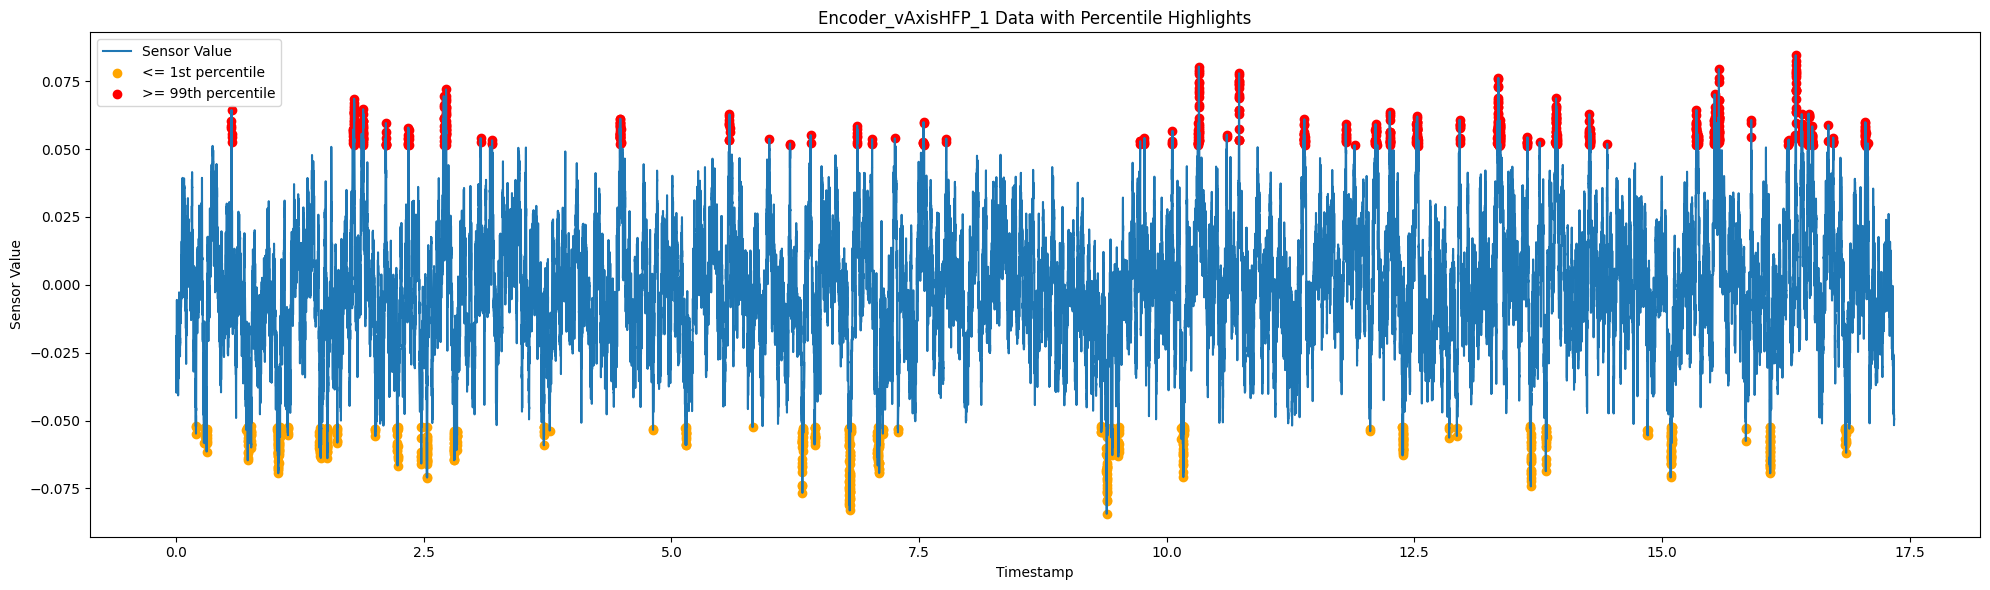

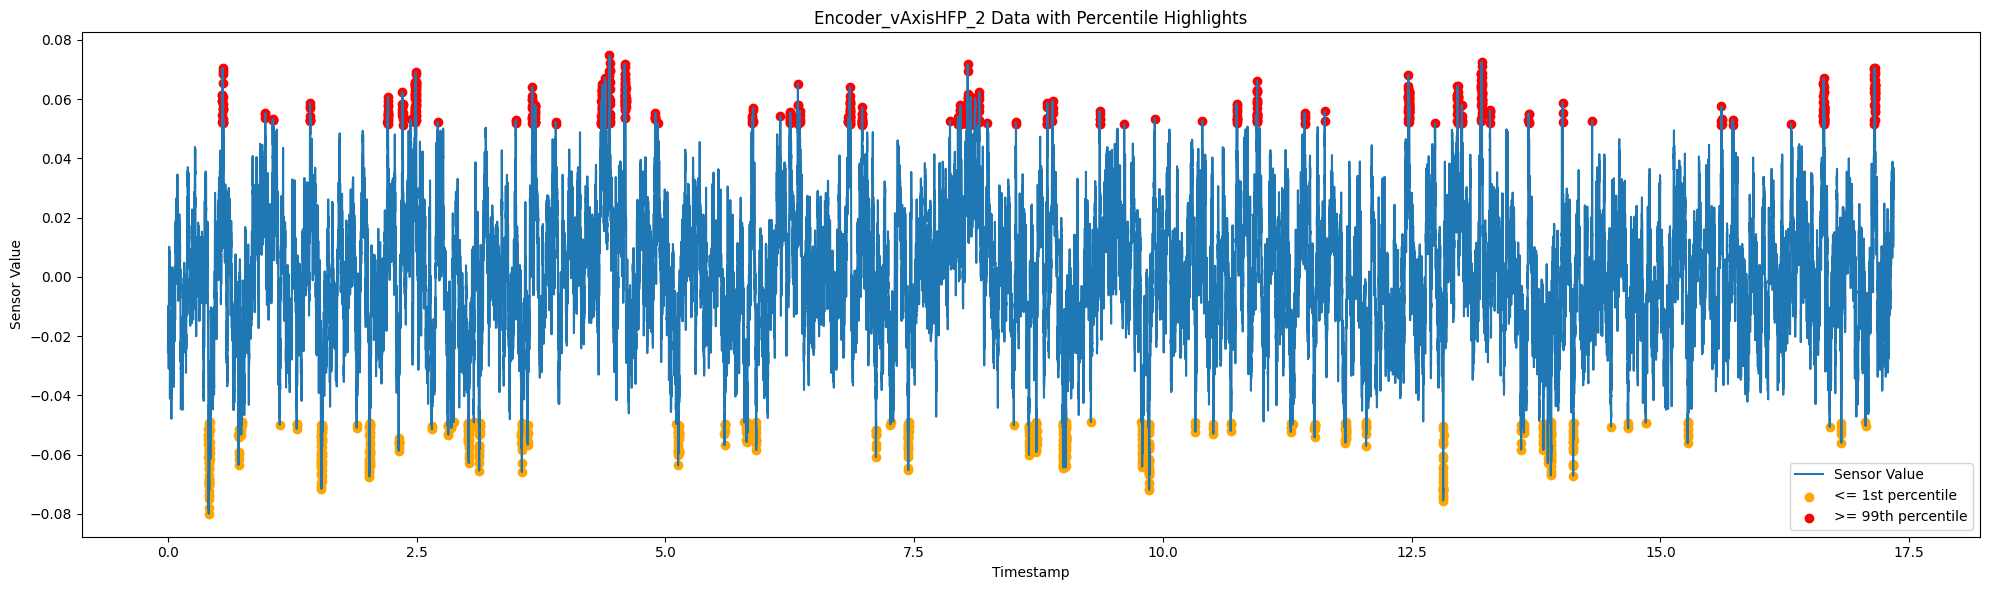

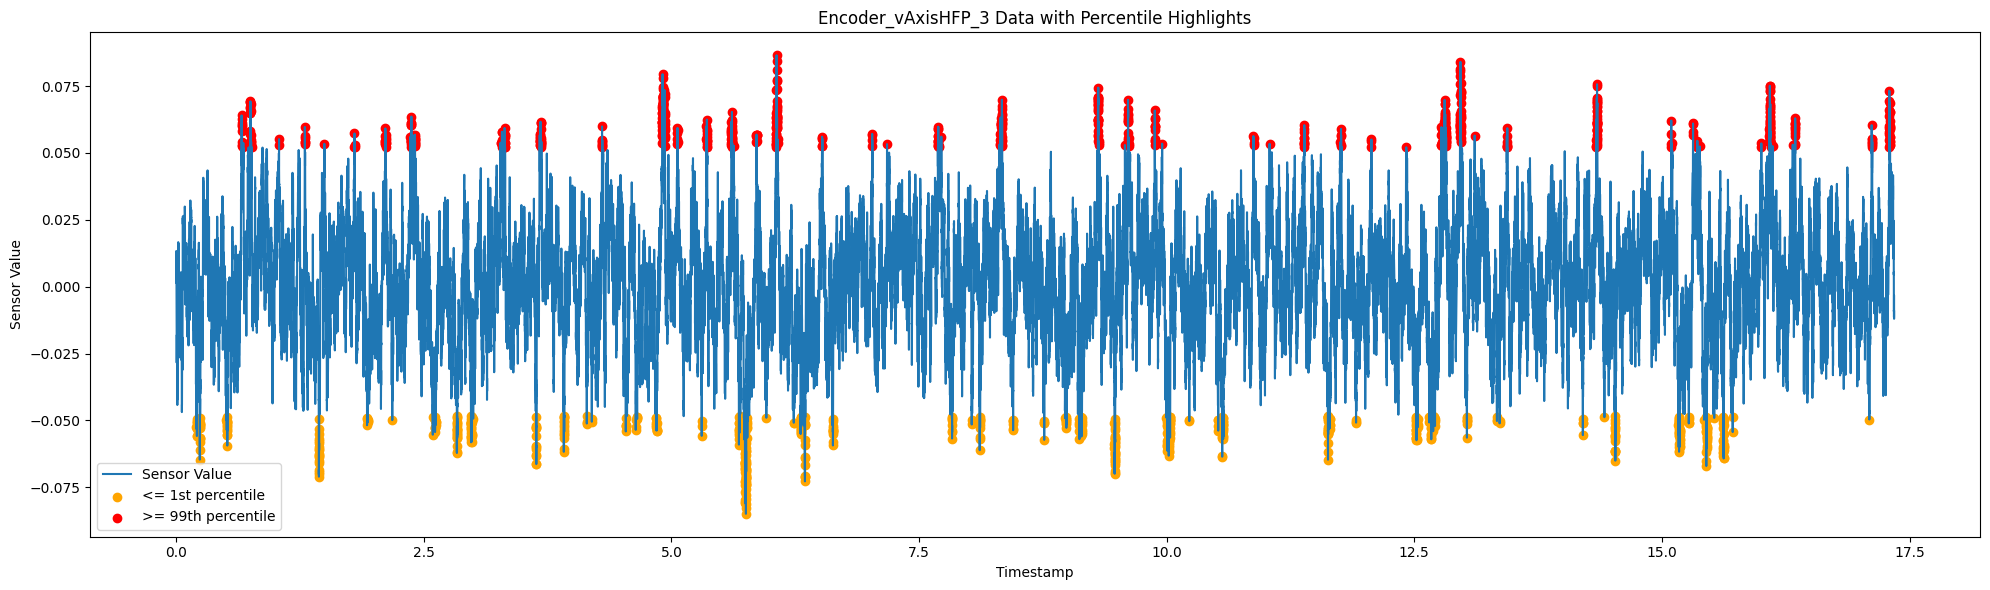

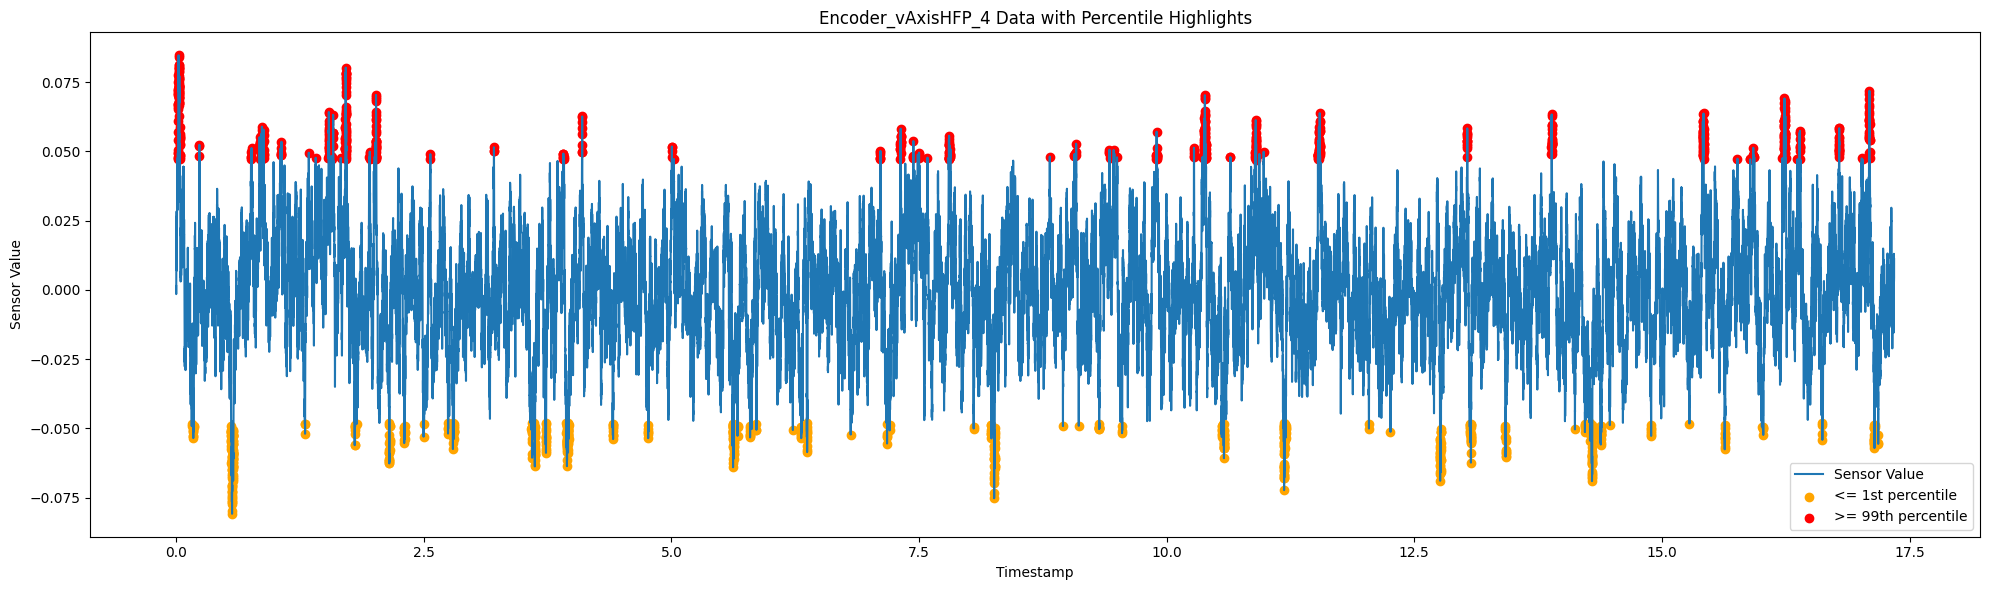

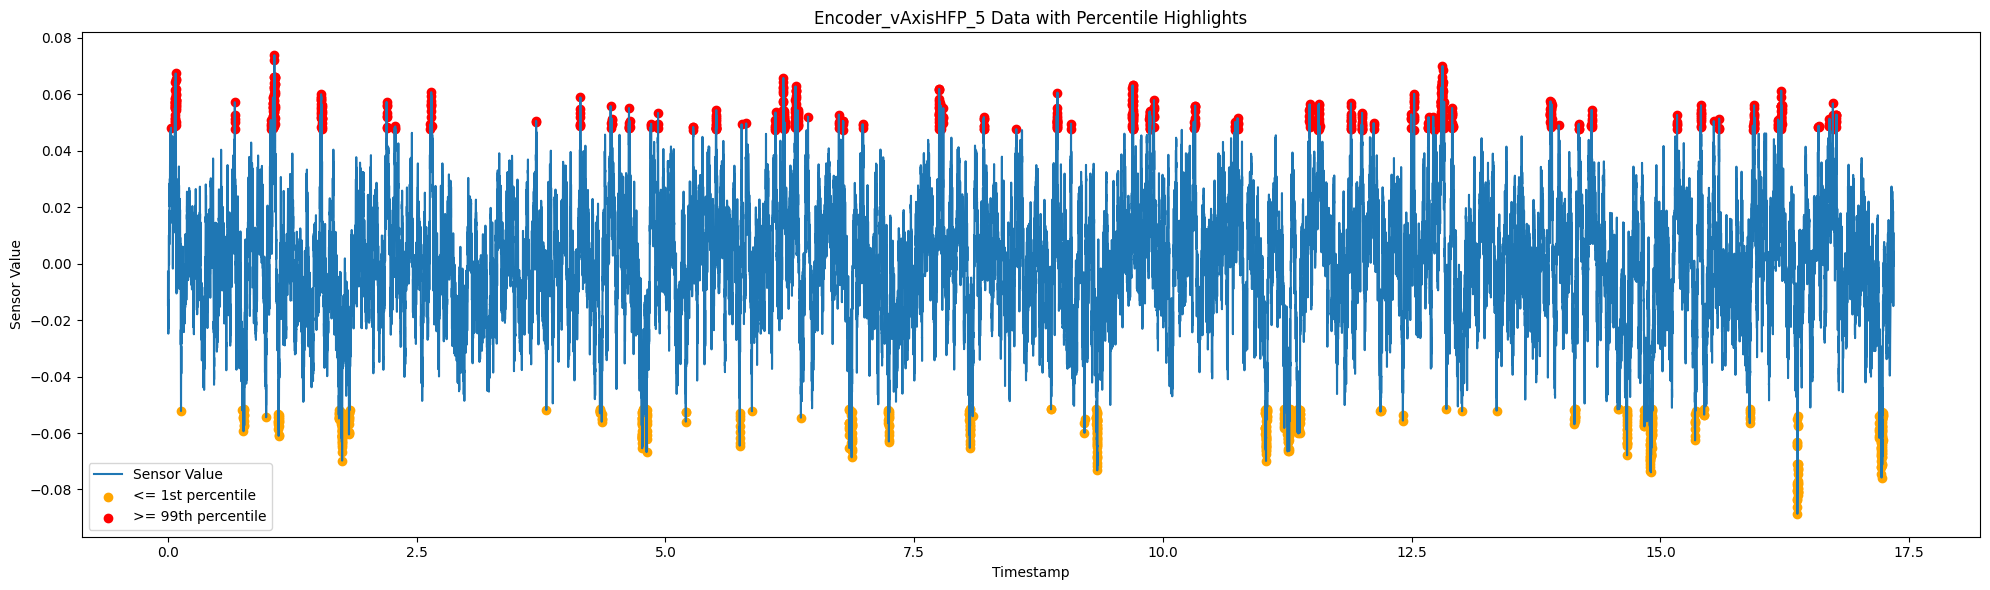

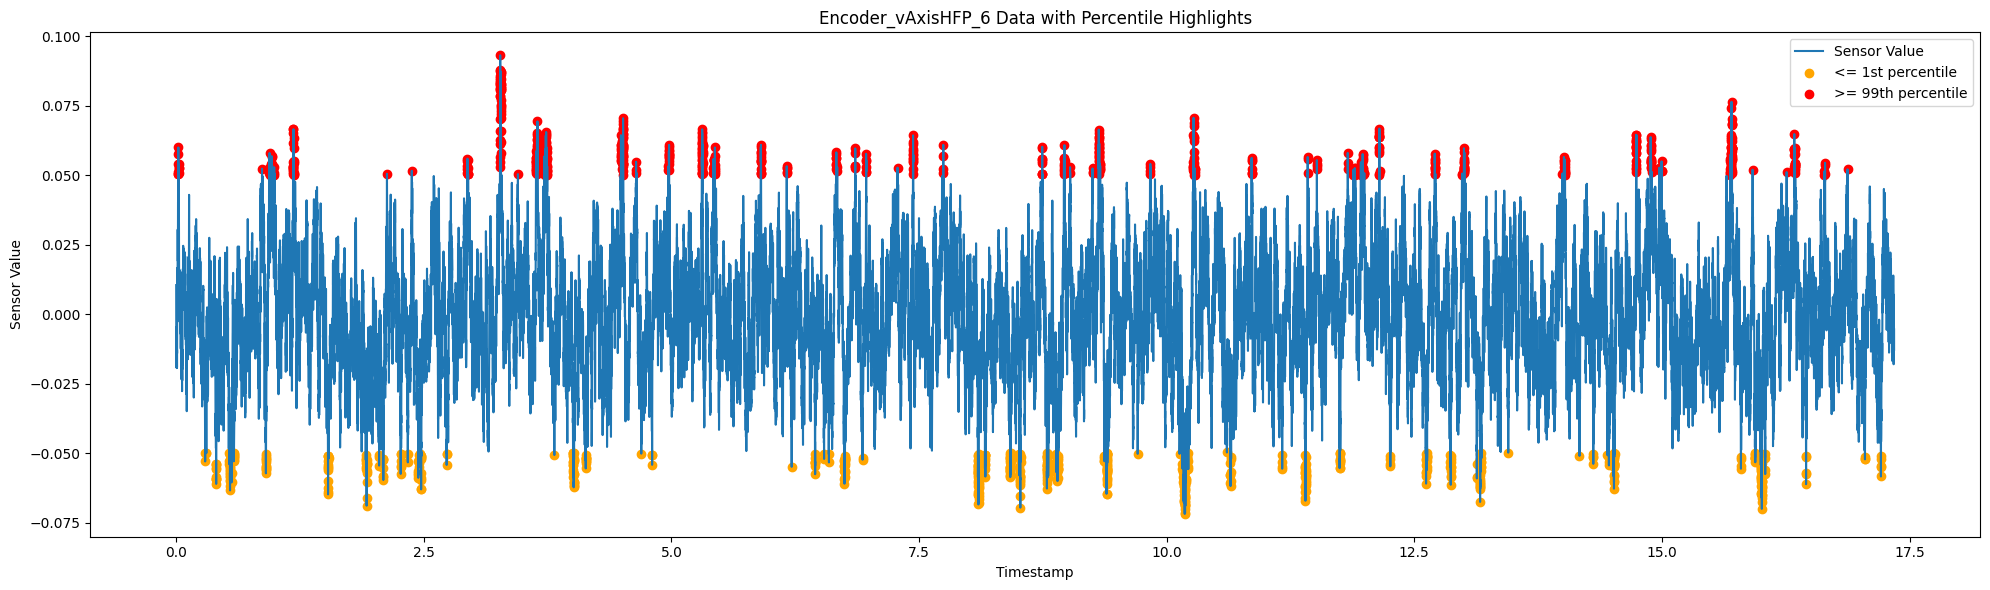

In [ ]:
for sensor in sensor_cols:
    plt.figure(figsize=(20, 6))
    plt.plot(df2['Time'], df2[sensor], label='Sensor Value')
    plt.scatter(low_pts['Time'],  low_pts[sensor],  marker='o', color='orange', label='<= 1st percentile')
    plt.scatter(high_pts['Time'], high_pts[sensor], marker='o', color='red', label='>= 99th percentile')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Value')
    plt.title(sensor + ' Data with Percentile Highlights')
    plt.legend()
    plt.tight_layout()
    plt.show()


### Reinforcement Learning

In [ ]:
# import gymnasium as gym
# import numpy as np
# import pandas as pd
# from gymnasium import spaces
# from stable_baselines3 import PPO

# class AnomalyEnv(gym.Env):
#     """
#     A simple Gym env where at each time-step the agent sees the current sensor
#     reading (or a window of readings) and must output 0=normal or 1=anomaly.
#     Rewards are +1 for a correct flag, -1 for an incorrect one.
#     """
#     metadata = {"render.modes": []}

#     def __init__(self, df, window_size=1):
#         super().__init__()
#         # df must have columns ['sensor1',...,'sensorN','is_anomaly']
#         self.window_size = window_size
#         self.data = df.reset_index(drop=True)
#         self.max_steps = len(df) - window_size
#         # Observation: window_size × N_sensors
#         n_sensors = df.filter(regex="^sensor").shape[1]
#         self.observation_space = spaces.Box(
#             low=-np.inf, high=np.inf,
#             shape=(window_size, n_sensors), dtype=np.float32
#         )
#         # Action: 0 or 1
#         self.action_space = spaces.Discrete(2)
#         self.reset()

#     def reset(self):
#         self.ptr = 0
#         return self._get_obs()

#     def _get_obs(self):
#         slice_ = self.data.loc[self.ptr:self.ptr+self.window_size-1,
#                                self.data.filter(regex="^sensor").columns]
#         return slice_.values.astype(np.float32)

#     def step(self, action):
#         # Ground-truth label is at the last point in window
#         true_label = int(self.data.loc[self.ptr + self.window_size - 1, "is_anomaly"])
#         reward = 1 if action == true_label else -1
#         self.ptr += 1
#         done = (self.ptr > self.max_steps)
#         obs = self._get_obs() if not done else np.zeros_like(self._get_obs())
#         return obs, reward, done, {}


# env = AnomalyEnv(df2, window_size=5)

# # Create and train a PPO agent
# model = PPO(
#     policy="MlpPolicy",
#     env=env,
#     verbose=1,
#     learning_rate=3e-4,
#     n_steps=2048,
#     batch_size=64,
#     ent_coef=0.01,
#     device="auto"
# )
# model.learn(total_timesteps=50_000)

# # Evaluate the trained agent
# obs = env.reset()
# correct = 0
# total = 0
# done = False
# while not done:
#     action, _ = model.predict(obs, deterministic=True)
#     _, reward, done, _ = env.step(action)
#     correct += (reward > 0)
#     total += 1

# print(f"Accuracy over episode: {correct/total:.2%}")


### Transformer Autoencoder

In [ ]:
# split pooled into train/val/test
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(pooled[sensor_cols], test_size=0.1, random_state=1, shuffle=True)
X_test = df2_mm[sensor_cols]

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (183420, 6)
Validation shape: (20380, 6)
Test shape: (69377, 6)


In [ ]:
T = 30  # length of the sliding window

def make_windows(data, window_size):
    # returns array of shape (n_time - T + 1, T, n_sensors)
    return np.stack([
        data[i : i + window_size]
        for i in range(len(data) - window_size + 1)
    ], axis=0)

X_train = make_windows(X_train, T)
X_val = make_windows(X_val, T)
X_test = make_windows(X_test, T)
print("Shape of train:", X_train.shape)
print("Shape of validation:", X_val.shape)
print("Shape of test:", X_test.shape)


Shape of train: (183391, 30, 6)
Shape of validation: (20351, 30, 6)
Shape of test: (69348, 30, 6)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam

# Hyperparameters          
n_sensors = 6   # number of sensor channels
d_model = 64    # transformer hidden dimension
n_heads = 4     # attention heads
d_ff = 128      # feed-forward hidden dim
n_layers = 2    # number of encoder/decoder blocks

# Positional Encoding
def get_positional_encoding(T, d_model):
    pos = np.arange(T)[:, None]
    i   = np.arange(d_model)[None, :]
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    angle_rads = pos * angle_rates
    # apply sin to even indices; cos to odd
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    angle_rads = angle_rads[np.newaxis, ...]            # now shape = (1, T, d_model)
    return tf.constant(angle_rads, dtype=tf.float32)

# Transformer block (single)
def transformer_block(x, mask=None):
    # multi-head self-attn
    attn_out = layers.MultiHeadAttention(
        num_heads=n_heads, key_dim=d_model // n_heads
    )(x, x, attention_mask=mask)
    x = layers.Add()([x, attn_out])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    # feed-forward
    ff = layers.Dense(d_ff, activation="relu")(x)
    ff = layers.Dense(d_model)(ff)
    x = layers.Add()([x, ff])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x

# Build the Transformer Autoencoder
# 1) Inputs: raw sensor windows, shape=(T, n_sensors)
inp = Input(shape=(T, n_sensors), name="sensor_window")

# 2) Project sensors up to d_model, and add positional encoding
proj = layers.Dense(d_model)(inp)   # (batch, T, d_model)
pos_enc = get_positional_encoding(T, d_model)
x = layers.Add()([proj, pos_enc])

# 3) Encoder: stack of self-attn blocks
for _ in range(n_layers):
    x = transformer_block(x)
encoded_seq = x  # shape (batch, T, d_model)

# 4) Bottleneck: optionally you could pool to a vector, 
#    but here we keep full seq for decoding
#    (for anomaly detection you may compute reconstruction error on the full sequence)

# 5) Decoder: same architecture, attending only to itself
y = encoded_seq
for _ in range(n_layers):
    y = transformer_block(y)
decoded = layers.Dense(n_sensors, name="reconstruction")(y)  # back to sensor dims

# 6) Model & compile
model = Model(inputs=inp, outputs=decoded, name="Transformer_AE")
model.compile(optimizer=Adam(1e-4), loss="mse")
model.summary()

# --- Train ---
model.fit(X_train, X_train, validation_data=(X_val, X_val),
          epochs=10, batch_size=30)

# --- Anomaly scoring ---
X_pred = model.predict(X_test)
mse = np.mean((X_test - X_pred)**2, axis=(1,2))
threshold = np.percentile(mse, 99)
anomalies = mse > threshold


Model: "Transformer_AE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ sensor_window (InputLayer)    │ (None, 30, 6)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 30, 64)            │             448 │ sensor_window[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (1, 30, 64)               │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (1, 30, 64)               │          16,640 │ add[0][0], add[0][0]       │
│ (MultiHeadAttention)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (1, 30, 64)               │               0 │ add[0][0],                 │
│                               │                           │                 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (1, 30, 64)               │             128 │ add_1[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (1, 30, 128)              │           8,320 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (1, 30, 64)               │           8,256 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_2 (Add)                   │ (1, 30, 64)               │               0 │ layer_normalization[0][0], │
│                               │                           │                 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (1, 30, 64)               │             128 │ add_2[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_1        │ (1, 30, 64)               │          16,640 │ layer_normalization_1[0][… │
│ (MultiHeadAttention)          │                           │                 │ layer_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_3 (Add)                   │ (1, 30, 64)               │               0 │ layer_normalization_1[0][… │
│                               │                           │                 │ multi_head_attention_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_2         │ (1, 30, 64)               │             128 │ add_3[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 134,726 (526.27 KB)

 Trainable params: 134,726 (526.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 206s 31ms/step - loss: 0.0247 - val_loss: 1.0239e-04
Epoch 2/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 196s 32ms/step - loss: 4.6164e-05 - val_loss: 3.8976e-05
Epoch 3/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 213s 35ms/step - loss: 2.6393e-05 - val_loss: 3.9061e-05
Epoch 4/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 235s 38ms/step - loss: 1.8430e-05 - val_loss: 7.6172e-06
Epoch 5/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 237s 39ms/step - loss: 1.4955e-05 - val_loss: 2.6537e-05
Epoch 6/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 243s 40ms/step - loss: 1.2546e-05 - val_loss: 7.9035e-06
Epoch 7/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 233s 38ms/step - loss: 1.1066e-05 - val_loss: 9.9342e-06
Epoch 8/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 242s 40ms/step - loss: 9.8349e-06 - val_loss: 2.5799e-05
Epoch 9/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 251s 41ms/step - loss: 8.9660e-06 - val_loss: 1.1501e-05
Epoch 10/10
6114/6114 ━━━━━━━━━━━━━━━━━━━━ 252s 41ms/step - loss: 8.1493e-06 - val_loss: 6.7785e-06
2168/2168 ━━━

In [ ]:
X_test_df = df2_mm[sensor_cols + ['Time']].copy()
X_test_df.shape

(69377, 7)